In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re
from wordcloud import WordCloud
import pycountry
from textblob import TextBlob
from nrclex import NRCLex

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Asus-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
d1s1 = pd.read_excel('[GDC Dataset 1] Global Dialogue Cadence 1 Results.xlsx', sheet_name='GD1_opinion_questions')
d1s2 = pd.read_excel('[GDC Dataset 1] Global Dialogue Cadence 1 Results.xlsx', sheet_name='GD1_poll_questions')

d2s1 = pd.read_excel('[GDC Dataset 2] Personalized AI Dialogue Results.xlsx', sheet_name='MD1_opinion_questions')
d2s2 = pd.read_excel('[GDC Dataset 2] Personalized AI Dialogue Results.xlsx', sheet_name='MD1_poll_questions')

In [3]:
d2s1.head(3)

,Question ID,Question Type,Question,English Responses,Submitted By,Language,Participant ID,Sentiment,All(1071),O2: 18-25 (320),...,Southern Europe (24),Western Europe (44),O1: Portuguese (Brazil) (32),O1: Arabic (20),O1: Russian (34),O1: Spanish (72),O1: Chinese (China) (70),O1: English (827),O1: French (11),O1: Hindi (5)
0,c67e414e-a02f-4ef5-a26a-68553a1df15f,Ask Opinion,"When you work with an AI assistant, would you ...","More formal in your answers, since in the cont...","Central America, North America, O1: Spanish, O...",Spanish,45d44313-c928-4cdb-aa31-d60608077fd5,Neutral,0.58,0.58,...,0.71,0.55,0.53,0.65,0.44,0.67,0.59,0.58,0.36,0.8
1,c67e414e-a02f-4ef5-a26a-68553a1df15f,Ask Opinion,"When you work with an AI assistant, would you ...","When I work with an AI assistent, I would pref...","Asia, O1: English, O2: 18-25, O3: Female, O4: ...",English,3ed1edc8-f2de-40e0-b117-64bdbaeefe04,Neutral,0.58,0.59,...,0.75,0.57,0.53,0.60,0.47,0.64,0.60,0.58,0.36,0.8
2,c67e414e-a02f-4ef5-a26a-68553a1df15f,Ask Opinion,"When you work with an AI assistant, would you ...",I would prefer it to provide detailed explanat...,"Asia, O1: English, O2: 26-35, O3: Female, O4: ...",English,1866883e-45e9-483f-836a-2fc8789bdccf,Neutral,0.58,0.55,...,0.67,0.57,0.47,0.60,0.41,0.63,0.60,0.58,0.27,0.8


In [4]:
d1s2.head(3)

,Question ID,Question Type,Question,Responses,All(1294),O1: Arabic (17),O1: English (997),O1: Russian (29),O1: Chinese Simplified (105),O1: French (13),...,South Eastern Asia (91),Souther Asia (276),Western Asia (59),Caribbean (2),Central America (23),Northern America (144),Eastern Europe (35),Norther Europe (68),Southern Europe (32),Western Europe (43)
0,ac7724c0-5aad-414a-b06d-19c05818892c,Poll Single Select,Please select your preferred language:,Arabic,0.013,1.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.034,0.0,0.000,0.000,0.000,0.000,0.031,0.000
1,ac7724c0-5aad-414a-b06d-19c05818892c,Poll Single Select,Please select your preferred language:,English,0.770,0.0,1.0,0.0,0.0,0.0,...,0.989,0.982,0.881,1.0,0.087,0.778,0.771,0.735,0.656,0.767
2,ac7724c0-5aad-414a-b06d-19c05818892c,Poll Single Select,Please select your preferred language:,Russian,0.022,0.0,0.0,1.0,0.0,0.0,...,0.000,0.000,0.068,0.0,0.000,0.007,0.229,0.029,0.031,0.047


In [5]:
language_df = d1s2.iloc[0:8, 3:5]
language_df['All(1294)'] = language_df['All(1294)'] * 100

language_df

,Responses,All(1294)
0,Arabic,1.3
1,English,77.0
2,Russian,2.2
3,Chinese (China),8.1
4,French,1.0
5,Portuguese,2.9
6,Hindi,0.4
7,Spanish,7.0


In [6]:
print("Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…")

feel_df = d1s2.iloc[22:25, 3:5]
feel_df['All(1294)'] = feel_df['All(1294)'] * 100
feel_df

Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…


,Responses,All(1294)
22,More excited than concerned,34.5
23,Equally concerned and excited,55.6
24,More concerned than excited,9.8


In [7]:
print("Countries with the most respondents:")

population_df = d1s2.iloc[33:230, 3:5]
population_df['All(1294)'] = population_df['All(1294)'] * 100
population_df = population_df.sort_values(by='All(1294)', ascending=False)
population_df.head(10)

Countries with the most respondents:


,Responses,All(1294)
108,India,18.1
120,Kenya,14.7
220,United States,7.7
68,China,6.8
67,Chile,4.3
219,United Kingdom,3.8
63,Canada,3.4
109,Indonesia,3.2
56,Brazil,3.2
113,Israel,2.7


In [8]:
print("Countries with the most respondents:")

population_df2 = d2s2.iloc[33:229, 3:5]
population_df2['All(1120)'] = population_df2['All(1120)'] * 100
population_df2 = population_df2.sort_values(by='All(1120)', ascending=False)
population_df2.head(10)

Countries with the most respondents:


,Responses,All(1120)
108,India,18.7
120,Kenya,15.8
219,United States,6.4
67,Chile,4.3
218,United Kingdom,4.2
68,China,4.2
113,Israel,3.8
109,Indonesia,3.6
56,Brazil,3.1
63,Canada,2.8


In [9]:
print("Unique questions in Dataset 2, Section 1:")
d1s1['Question'].unique()


Unique questions in Dataset 2, Section 1:


array(["What do you think your life might be like in 30 years? Alt: Imagine life 30 years from now. What's the biggest difference you notice in daily life compared to today?",
       'What is another dangerous outcome you can imagine happening from AI? What would need to be true for that to happen?',
       'What is another positive outcome you can imagine happening from AI? What would need to be true for that to happen?',
       'What are the first decisions in your life that you would delegate to an AI?',
       'Describe a concrete scenario where you would feel uncomfortable with an AI making a decision instead of a human. What specific aspects make you uneasy?',
       'Explain what makes one of these scenarios better to you than the other.',
       'What is ONE specific ethical or moral principle, virtue, or value that you think is core to how you live your life? Please explain it in detail.',
       'What is one ethical or moral principle, virtue, or value that you think is impor

In [10]:
print("Unique questions in Dataset 2, Section 1:")
d2s1['Question'].unique()

Unique questions in Dataset 2, Section 1:


array(['When you work with an AI assistant, would you prefer it to: \nBe more formal or casual in its responses?\nProvide detailed explanations or get straight to the point?\nTake on a specific role (like a teacher, editor, or coach)?\nFocus on certain topics or areas of expertise?',
       'What kind of personality traits would be most helpful for your needs? For instance:\nShould it be more analytical or creative?\nWould you like it to ask clarifying questions or work with what you provide?\nShould it challenge your ideas or mainly provide support?',
       'Would you want your AI to be tailored to your local context? What would that look like?',
       'Think about your goals:\nAre you using AI mainly for learning, productivity, creativity, or something else? How well is it working?',
       'Think about your goals:\nWould you prefer responses that encourage discussion or just give direct answers?',
       "Imagine you're working with an AI assistant on important tasks in your life.

★★★

Now that we are familiarized with the data, we move to the more relvant data for our project:

In [11]:
print("Size of Dataset 1:", len(d1s1))
print("Size of Dataset 2:", len(d2s1))

Size of Dataset 1: 19669
Size of Dataset 2: 20869


In [12]:
live_df = d1s2.iloc[19:22, 3:5]
live_df['All(1294)'] = live_df['All(1294)'] * 100
live_df

,Responses,All(1294)
19,Rural,7.5
20,Suburban,27.1
21,Urban,65.4


In [13]:
live_df = d2s2.iloc[19:22, 3:5]
live_df['All(1120)'] = live_df['All(1120)'] * 100
live_df

,Responses,All(1120)
19,Rural,7.1
20,Suburban,26.0
21,Urban,67.0


Question: What is another positive outcome you can imagine happening from AI? What would need to be true for that to happen?

In [14]:
q1_df = d1s1[d1s1['Question'] == "What is another positive outcome you can imagine happening from AI? What would need to be true for that to happen?"][['English Response', 'Submitted By']]

def extract_area(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    if " urban" in text:
        return "Urban"
    elif " suburban" in text:
        return "Suburban"
    elif " rural" in text:
        return "Rural"
    else:
        return "Unknown"

q1_df['Area Type'] = q1_df['Submitted By'].apply(extract_area)
# q1_df['Area Type'].value_counts()
# q1_df

In [15]:
q1_df = q1_df.dropna(subset=['English Response', 'Area Type'])
grouped_texts = q1_df.groupby('Area Type')['English Response'].apply(lambda x: ' '.join(x)).to_dict()
grouped_texts

{'Rural': 'I think there will improved healthcare due to AI but I think simultaneously rate of health services will also be increase but the good point is there will be increased efficiency & productivity. Ai help in education by improving engagement & through personalized learning also AI can help in optimize energy use improve waste management & support climate change & predict climate change with solution.AI can help in reducing accidents through improving mobility options for people who unable to drive AI could revolutionize health care by providing more accurate and personalized diagnosis, treatment, and preventive care. AI can help address global food security and the environment challenges by optimizing agriculture practices and reducing waste  AI could help budget and find best products to save money Another positive in AI \n\nPersonalized medicine AI helps tailor treatments to individual genetic profiles, medical histories, and lifestyles.\n\nAI diagnostic tools identify healt

In [16]:
stopwords = set([
    'the', 'and', 'for', 'that', 'with', 'this', 'from', 'have', 'will', 'would', 'could', 'they',
    'their', 'which', 'what', 'when', 'where', 'about', 'like', 'just', 'some', 'more', 'into', 
    'than', 'then', 'them', 'been', 'being', 'because', 'very', 'make', 'might', 'also', 'those',
    'can', 'you', 'your', 'our', 'one', 'are', 'not', 'but', 'all', 'how', 'who', 'has', 'had', 
    'there', 'any', 'such', 'many', 'its', "it's", 'etc', 'need', 'get', 'still', 'way', 'use', 'ai'
])

def get_common_words(text, top_n=20):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [w for w in words if w not in stopwords and len(w) > 3]
    return Counter(filtered_words).most_common(top_n)

keywords_by_area = {}

for area, text in grouped_texts.items():
    keywords_by_area[area] = get_common_words(text)


In [17]:
for area, keywords in keywords_by_area.items():
    print(f"\nTop keywords for {area}:")
    for word, count in keywords:
        print(f"{word}: {count}")


Top keywords for Rural:
help: 23
life: 19
think: 17
people: 17
positive: 16
better: 12
time: 12
work: 11
tasks: 11
health: 10
things: 10
human: 10
jobs: 10
data: 9
change: 8
these: 8
world: 8
most: 8
easier: 8
less: 8

Top keywords for Suburban:
help: 95
people: 92
work: 50
humans: 48
time: 46
positive: 45
life: 44
human: 43
data: 43
tasks: 38
think: 34
used: 33
easier: 32
information: 31
better: 30
happen: 28
jobs: 25
health: 24
systems: 24
making: 23

Top keywords for Urban:
help: 219
people: 191
time: 141
work: 131
life: 124
human: 120
positive: 105
tasks: 91
data: 85
humans: 83
think: 76
better: 75
happen: 73
information: 71
improve: 70
artificial: 67
intelligence: 67
health: 65
systems: 63
outcome: 62


In [18]:
urban_words = set(word for word, _ in keywords_by_area.get('Urban', []))
rural_words = set(word for word, _ in keywords_by_area.get('Rural', []))
suburban_words = set(word for word, _ in keywords_by_area.get('Suburban', []))

shared_words = urban_words & rural_words & suburban_words
print("Words shared by all area types:", shared_words)

Words shared by all area types: {'data', 'positive', 'think', 'tasks', 'help', 'better', 'people', 'time', 'human', 'health', 'life', 'work'}


Q2. What is another dangerous outcome you can imagine happening from AI? What would need to be true for that to happen?

In [19]:
q2_df = d1s1[d1s1['Question'] == "What is another dangerous outcome you can imagine happening from AI? What would need to be true for that to happen?"][['English Response', 'Submitted By']]

q2_df['Area Type'] = q2_df['Submitted By'].apply(extract_area)

q2_df = q2_df.dropna(subset=['English Response', 'Area Type'])
grouped_textsq2 = q2_df.groupby('Area Type')['English Response'].apply(lambda x: ' '.join(x)).to_dict()

keywords_by_areaq2 = {}

for area, text in grouped_textsq2.items():
    keywords_by_areaq2[area] = get_common_words(text)


for area, keywords in keywords_by_areaq2.items():
    print(f"\nTop keywords for {area}:")
    for word, count in keywords:
        print(f"{word}: {count}")


Top keywords for Rural:
people: 52
human: 34
jobs: 22
dangerous: 18
think: 15
systems: 14
privacy: 13
happen: 12
other: 12
over: 12
weapons: 11
technology: 11
imagine: 10
become: 10
humans: 10
world: 10
already: 9
lead: 9
data: 9
autonomous: 9

Top keywords for Suburban:
people: 186
human: 81
humans: 70
jobs: 69
think: 66
dangerous: 55
used: 40
systems: 39
become: 38
outcome: 37
lead: 37
technology: 37
most: 37
privacy: 34
information: 34
already: 33
control: 33
happen: 32
over: 32
intelligence: 30

Top keywords for Urban:
people: 420
human: 223
intelligence: 170
artificial: 153
think: 150
humans: 150
jobs: 132
dangerous: 132
control: 106
data: 101
become: 98
used: 91
happen: 89
lead: 87
technology: 86
systems: 81
over: 81
information: 78
most: 76
work: 74


Q3. What kinds of cultural things would you be most worried about losing in a future with advanced AI?

In [20]:
q3_df = d1s1[d1s1['Question'] == "What kinds of cultural things would you be most worried about losing in a future with advanced AI?"][['English Response', 'Submitted By']]

q3_df['Area Type'] = q3_df['Submitted By'].apply(extract_area)

countries = [country.name.lower() for country in pycountry.countries]

def extract_country(text):
    if pd.isna(text):
        return None
    text_lower = text.lower()
    for country in countries:
        if country in text_lower:
            return country.title()  # Return nicely capitalized country name
    return None  # if no country found

q3_df['Country'] = q3_df['Submitted By'].apply(extract_country)
# q3_df

In [21]:
q3_df['Sentiment'] = q3_df['English Response'].apply(
    lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else 0
)

def get_emotions(text):
    if pd.isna(text):
        return {}
    emotions = NRCLex(text).raw_emotion_scores
    return emotions

q3_df['Emotions'] = q3_df['English Response'].apply(get_emotions)

#emotion dicts and sum counts per urban type
emotion_counts = {}

for setting in q3_df['Area Type'].unique():
    subset = q3_df[q3_df['Area Type'] == setting]
    all_emotions = Counter()
    for emo_dict in subset['Emotions']:
        all_emotions.update(emo_dict)
    emotion_counts[setting] = all_emotions

# convert to df
emotion_df = pd.DataFrame(emotion_counts).fillna(0).T

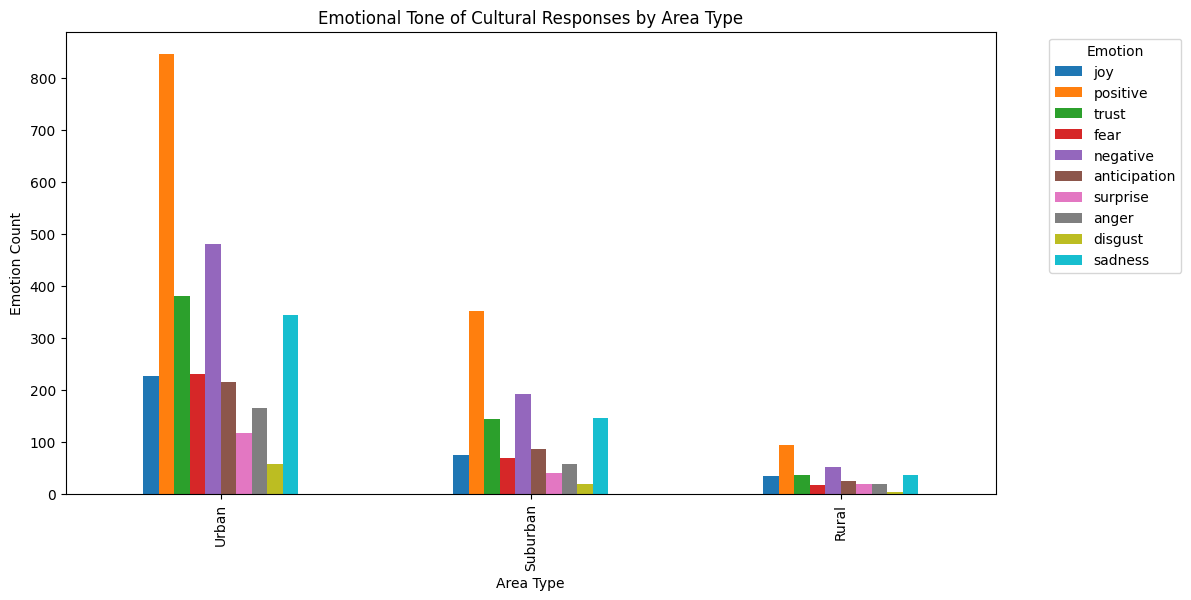

In [22]:
emotion_df.plot(kind='bar', figsize=(12,6))
plt.title('Emotional Tone of Cultural Responses by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Emotion Count')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [23]:
# exporting the different responses by area alongside their associasted country and sentiment

def save_responses_by_area(df, area_type):
    subset = df[df['Area Type'] == area_type]
    filename = f"{area_type.lower()}_responses.txt"
    with open(filename, 'w', encoding='utf-8') as f:
        for _, row in subset.iterrows():
            f.write(f"Country: {row.get('Country', 'Unknown')}\n")
            f.write(f"Response:\n{row['English Response']}\n")
            f.write(f"Emotions: {row['Emotions']}\n")
            f.write("-" * 40 + "\n")
    print(f"Saved {len(subset)} responses to {filename}")


for area in q3_df['Area Type'].unique():
    save_responses_by_area(q3_df, area)


Saved 725 responses to urban_responses.txt
Saved 300 responses to suburban_responses.txt
Saved 84 responses to rural_responses.txt


We analyzed the qualitative responses about culture by applying sentiment and emotion detection techniques. Each response was scored for overall sentiment polarity, revealing the general positive or negative tone. Additionally, we identified the presence and intensity of specific emotions such as joy, fear, disgust, and trust. By grouping responses according to respondents’ living environments (urban, suburban, rural) and countries, we compared emotional tones across these different contexts. This allowed us to uncover how feelings about cultural identity and concerns vary geographically and by community type, providing nuanced insights into the emotional landscape surrounding culture in the face of emerging technologies.

Q4. If you could make world leaders understand one thing, what would it be?

In [24]:
q4_df = d1s1[d1s1['Question'] == "If you could make world leaders understand one thing, what would it be?"][['English Response', 'Submitted By']]

q4_df['Area Type'] = q4_df['Submitted By'].apply(extract_area)
q4_df['Country'] = q4_df['Submitted By'].apply(extract_country)

# q4_df


In [30]:
from bertopic import BERTopic

def clean_text_for_topic_modeling(text):
    if pd.isna(text):
        return ''
    words = re.findall(r'\b\w+\b', text.lower())
    filtered = [w for w in words if w not in stopwords and len(w) > 3]
    return ' '.join(filtered)

cleanq4_df = q4_df['English Response'].dropna().apply(clean_text_for_topic_modeling).tolist()

topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(cleanq4_df)

In [31]:
topic_info = topic_model.get_topic_info()
topic_info.head(10)  # Show the top 10 topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,373,-1_people_should_stop_life,"[people, should, stop, life, humans, human, li...",[people want live peaceful life stop going hel...
1,0,58,0_technology_technological_ethical_ensuring,"[technology, technological, ethical, ensuring,...",[want world leaders understand profound impact...
2,1,50,1_respect_rights_culture_freedom,"[respect, rights, culture, freedom, human, dig...","[respect everyone, respect human life, respect..."
3,2,49,2_climate_change_sustainable_global,"[climate, change, sustainable, global, action,...",[want world leaders understand urgent collabor...
4,3,42,3_power_money_everything_point,"[power, money, everything, point, character, p...","[life power money, money power everything, pow..."
5,4,38,4_life_every_matter_lives,"[life, every, matter, lives, matters, live, hu...","[every life important, every life matter, ever..."
6,5,36,5_corruption_stop_corrupt_country,"[corruption, stop, corrupt, country, corrupts,...","[stop corruption, stop corruption, corruption]"
7,6,34,6_wars_weapons_nuclear_kill,"[wars, weapons, nuclear, kill, fight, anything...","[stop wars, wars, wars]"
8,7,32,7_decisions_world_leaders_good,"[decisions, world, leaders, good, people, citi...",[world leaders should understand dumb shady bu...
9,8,32,8_poor_rich_poverty_getting,"[poor, rich, poverty, getting, taxes, richer, ...",[understand making difficult survive shouldn l...


In [ ]:
q4_df = q4_df.reset_index(drop=True)
q4_df['Topic'] = topics

with open("bertopic_topic_summary.txt", "w", encoding="utf-8") as f:
    for topic_num in q4_df['Topic'].unique():
        f.write(f"\n--- Topic {topic_num} ---\n")
        f.write("Top keywords: " + str(topic_model.get_topic(topic_num)) + "\n")
        
        examples = q4_df[q4_df['Topic'] == topic_num]['English Response'].head(3)
        f.write("Examples:\n")
        for response in examples:
            f.write(f"- {response}\n")
        f.write("\n")


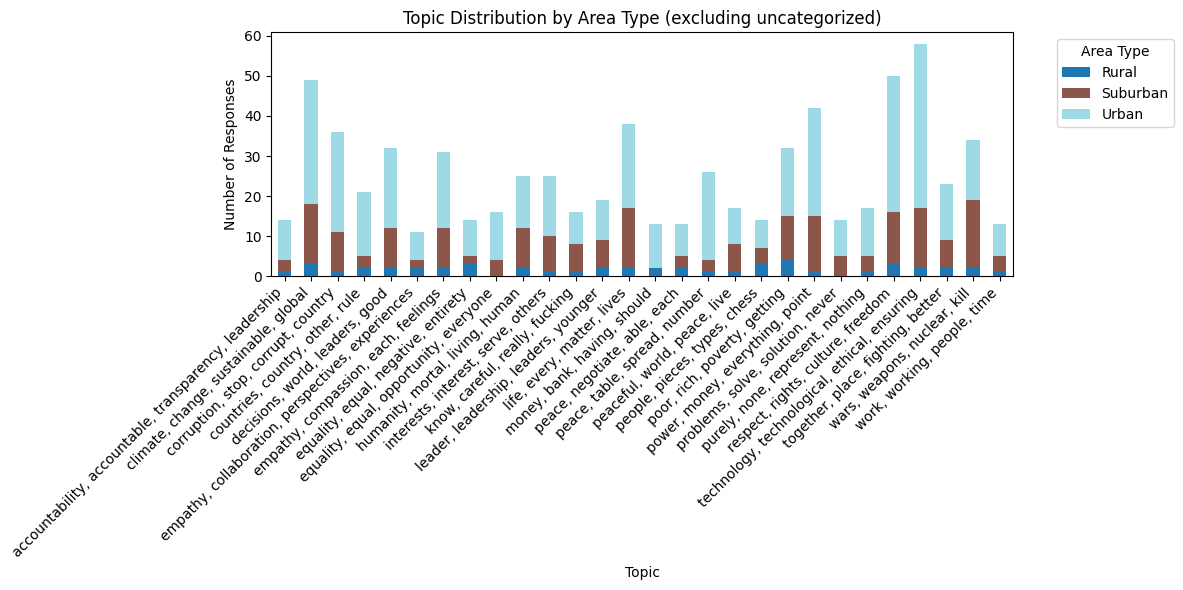

In [47]:
# how many times does a topic appear in each area type

topic_by_area = pd.crosstab(q4_df['Topic'], q4_df['Area Type'])
# topic_by_area.head()
topic_labels = {}
for topic_num in topic_model.get_topic_info()['Topic']:
    if topic_num == -1:
        topic_labels[topic_num] = "Other / Uncategorized"
        continue

    # Get top words for the topic
    top_words = topic_model.get_topic(topic_num)
    top_keywords = [word for word, _ in top_words[:4]]  # Adjust number as needed
    label = ", ".join(top_keywords)
    
    topic_labels[topic_num] = label

q4_df['Topic Label'] = q4_df['Topic'].map(topic_labels)

topic_counts = q4_df['Topic Label'].value_counts().sort_values(ascending=False)
topic_area_ct = pd.crosstab(q4_df['Topic Label'], q4_df['Area Type'])
filtered_df = q4_df[q4_df['Topic'] != -1]
topic_area_ct = pd.crosstab(filtered_df['Topic Label'], filtered_df['Area Type'])

# Plot stacked bar chart
topic_area_ct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Topic Distribution by Area Type (excluding uncategorized)")
plt.xlabel("Topic")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Area Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




The graph is cool but let's look at the top 5 in each area type to get a better understanding.

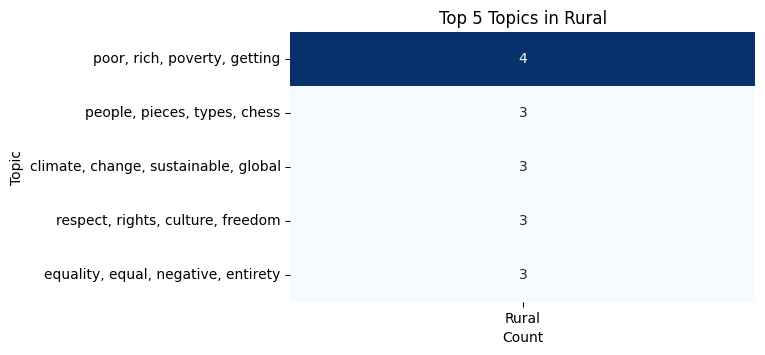

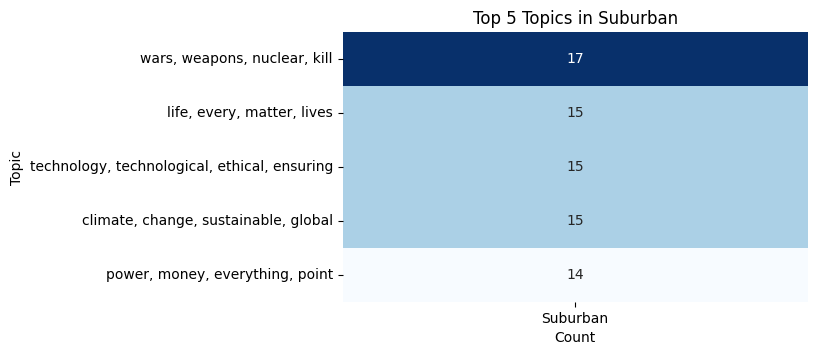

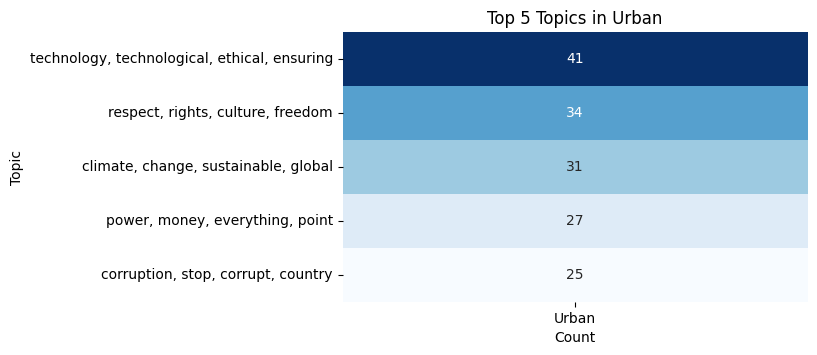

In [51]:
top_n = 5
top_topics_per_area = {}

for area in topic_area_ct.columns:
    # Sort topics descending by count for this area
    top_topics = topic_area_ct[area].sort_values(ascending=False).head(top_n).index.tolist()
    top_topics_per_area[area] = top_topics

top_topics = set(topic for topics in top_topics_per_area.values() for topic in topics)

filtered_topic_area_ct = topic_area_ct.loc[list(top_topics)]

top_n = 5  # Number of top topics per area type to show

for area in topic_area_ct.columns:
    # Get top topics for this area type
    top_topics = topic_area_ct[area].sort_values(ascending=False).head(top_n).index
    
    # Subset data for these topics and this area only
    data = topic_area_ct.loc[top_topics, [area]]
    
    plt.figure(figsize=(6, len(top_topics)*0.7))  # Adjust height by number of topics
    sns.heatmap(data, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Top {top_n} Topics in {area}")
    plt.xlabel("Count")
    plt.ylabel("Topic")
    plt.yticks(rotation=0)
    plt.show()

Now moving on to Dataset 2: